### Problem 1

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

#### a)

In [128]:
def lagrange(x, x_i, y_i):
	assert(len(x_i) == len(y_i))
	if not (isinstance(x, list) or isinstance(x, np.ndarray)):
		x = np.array([x])

	out = np.zeros(x.shape)
	for k in range(len(y_i)):
		L_k = np.ones(x.shape)
		for i in range(len(x_i)):
			if i == k:
				continue
			L_k *= (x - x_i[i]) / (x_i[k] - x_i[i])

		out += L_k * y_i[k]

	return out

Max error equedistant: 1.9156331475012054
Max error chebychev: 0.10915351076845359


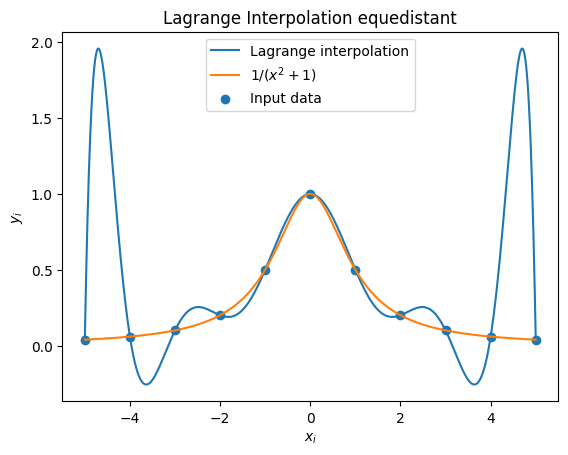

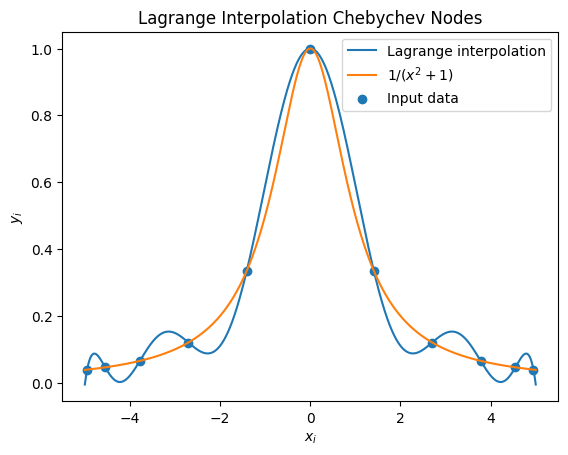

In [129]:

n = 10

def f(x):
    return 1/(x**2 + 1)

a, b   = -5, 5

# Equedistant
x_eq = np.linspace(a, b, n+1)
y_eq = f(x_eq)

# Chebychev
k        = np.arange(0, n+1)
x_cheb   = np.cos((k + 0.5)*np.pi / (n+1))
x_cheb = (b - a)/2 * x_cheb + (b+a)/2  # Convert chebychev nodes from [-1, 1] -> [a, b] and evaluate
y_cheb = f(x_cheb) 

# Evaluate against higher resolution
x_test   = np.linspace(a, b, 1000)
y_expect = f(x_test)

# Interpolate
y_interp_cheb = lagrange(x_test, x_cheb, y_cheb)
y_interp_eq   = lagrange(x_test, x_eq, y_eq)

# Calculate infinity norm
max_err_eq    = np.max(np.abs(y_interp_eq - y_expect))
max_err_cheb  = np.max(np.abs(y_interp_cheb - y_expect))
print(f"Max error equedistant: {max_err_eq}")
print(f"Max error chebychev: {max_err_cheb}")

plt.figure()
plt.title("Lagrange Interpolation equedistant")
plt.plot(x_test, y_interp_eq, label="Lagrange interpolation")
plt.plot(x_test, y_expect, label=r"$1/(x^2 + 1)$")
plt.scatter(x_eq, y_eq, label="Input data")
plt.xlabel(r"$x_i$")
plt.ylabel(r"$y_i$")
plt.legend(loc="upper center")

plt.figure()
plt.title("Lagrange Interpolation Chebychev Nodes")
plt.plot(x_test, y_interp_cheb, label="Lagrange interpolation")
plt.plot(x_test, y_expect, label=r"$1/(x^2 + 1)$")
plt.scatter(x_cheb, y_cheb, label="Input data")
plt.xlabel(r"$x_i$")
plt.ylabel(r"$y_i$")
plt.legend(loc="upper right")
plt.show()

#### b)

We know that the lagrange interpolation of degree $n$, $p_n$, of the function $f$ has the interpolation error 
$$    f(x) - p_n(x) = \frac{f^{(n+1)}(\xi_x)}{(n+1)!} \pi_{n+1}(x)   $$
(Numerical Analysis, 6.2). Now if the max value of the derivative on $x$, i.e. $M_{n+1} = \max_{\zeta \in [a, b]} |f^{(n+1)} (\zeta) |$ grows faster than the denominator $(n+1)!$, then the interpolation is unstable and will not converge. 

Now both the functions
$$(1):\:\:\:\:\:\:\:\:\: f(x) = \cos(2\pi x),   x \in [0, 1]$$
and 
$$(2): f(x) = e^{3x}\sin(2x), x \in [0, \pi/4]$$
have relatively bounded derivatives. For (1) we have
$$|f^{(n+1)}(x)| \leq (2\pi)^{n+1} $$
and for (2) we have
$$|f^{(n+1)}(x)| \leq |3 + 2i|^{n+1}e^{3x} \leq (\sqrt{13})^{n+1} e^{3\pi/4}, x \in [0, \pi/4]$$

Both of these derivatives grow more slowly than $(n+1)!$, so the infinity-norm converges 
$$||f - p_n||_\infty \to 0$$

Now since both of the functions are defined on bounded intervals we may say that the 2-norm also will converge on the given bounds, i.e if $|a|, |b| \leq \infty$, then the 2-norm will (I think) be approximately 
$$   ||f - p_n||_2 \leq \sqrt{b - a}||f - p_n||_\infty   $$
(using the definition of 2-norm and replacing the $f - p_n$ bit with the infinity norm $||f - p_n||$ as an upper bound, and then integrating).

Since the results above are derived from what I believe in the book is an equedistant $\mathbf{x}$ for interpolation, then changing to chebychev nodes only the $\pi(x)$ function is really changed, which I believe will not grow more quickly than $(n+1)!$, and therefore the whole norm will also converge so long as the equedistant one converges.

Before doing the plotting I think I'll do the error bound calculation as a function of $n$ on $f(x) = \cos(2\pi x), x \in [0, 1]$, since it has to be included in the plot. 

We have the error bound from the book as 
$$|f(x) - p_n(x)| \leq \frac{M_{n+1}}{(n+1)!}|\pi_{n+1}(x)|,\:\:\:\:\:\: M_{n+1} = \max_{[a, b]} |f^{(n+1)}(x)|,\:\:\:\:\:\: \pi_{n+1}(x) = \prod_{j=0}^{n}(x - x_j)$$

Therefore the max-norm is defined as 
$$||f(x) - p_n(x)||_\infty \leq \frac{M_{n+1}}{(n+1)!} \max_{[a, b]}|\pi_{n+1}(x)| $$

We previously found that $M_{n+1} = (2\pi)^{n+1}$ for $f(x) = \cos(2\pi x)$. If we now let $\pi$ be the function for the chebychev nodes, we know that $\pi_{n+1} = 2^{-1}T_{n+1}(x)$, and since $|T_{n+1}| \leq 1$ (per def in the book), we know that
$$ \max_{[-1, 1]}|\pi_{n+1}(x)| =  2^{-n} $$
So, scaling to $[0, 1]$ we get
$$ \max_{[0, 1]}|\pi_{n+1}(x)| =  2^{-n} \cdot \left(\frac{1}{2}\right)^{n+1} = 2^{-(2n + 1)} $$

Therefore the max-norm is written as 
$$ ||f(x) - p_n(x)||_\infty \leq \frac{(2\pi)^{n+1}}{(n+1)!} 2^{-(2n+1)}   $$

[ 3  4  5  6  7  8  9 10]


100%|██████████| 8/8 [00:00<00:00, 3117.57it/s]


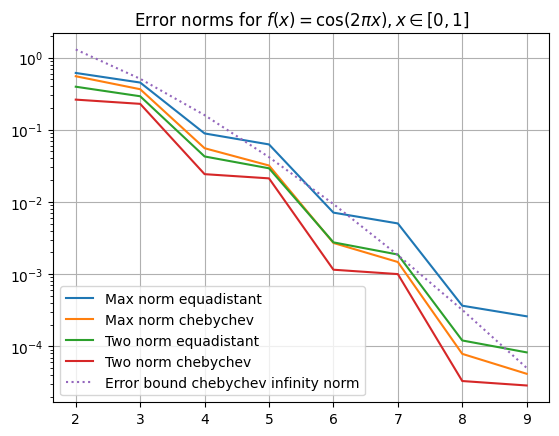

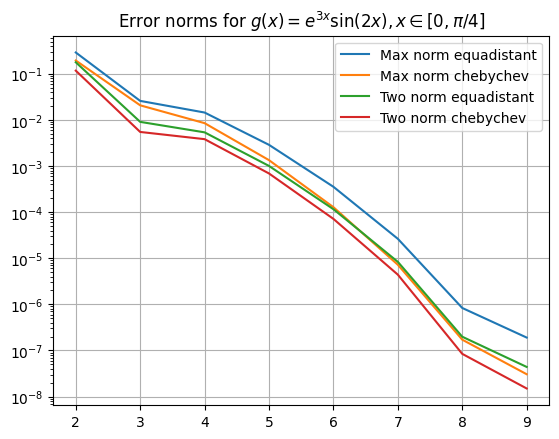

In [143]:
from scipy.special import factorial

def max_norm(f, p):
    return np.max(np.abs( f - p))

def two_norm(f, p, a, b, N):
    return np.sqrt(b - a)/np.sqrt(N) * np.sqrt( np.sum((f - p)**2) )

def f(x):
    return np.cos(2*np.pi * x)

def g(x):
    return np.exp(3*x) * np.sin(2*x)

def run_approximation(n, N, a, b, f):
    # Equadistant nodes    
    x_i_equadist = np.linspace(a, b, n+1)

    # Chebychev nodes
    k  = np.arange(0, n+1)
    x_i_cheb = np.cos((k + 0.5)*np.pi / (n+1))
    x_i_cheb     = (b - a)/2 * x_i_cheb + (b + a)/2 # Map to [a, b]

    # Get interpolation points y_i
    y_i_equadist = f(x_i_equadist)
    y_i_cheb     = f(x_i_cheb)

    # Define evaluation space
    x_eval = np.linspace(a, b, N+1)
    y_eval = f(x_eval)

    # Interpolate
    p_interp_equadist = lagrange(x_eval, x_i_equadist, y_i_equadist)
    p_interp_cheb     = lagrange(x_eval, x_i_cheb, y_i_cheb)

    # Calculate norms
    max_norm_equadist = max_norm(y_eval, p_interp_equadist)
    max_norm_cheb     = max_norm(y_eval, p_interp_cheb)

    two_norm_equadist = two_norm(y_eval, p_interp_equadist, a, b, N+1)
    two_norm_cheb     = two_norm(y_eval, p_interp_cheb, a, b, N+1)

    return (max_norm_equadist, max_norm_cheb, two_norm_equadist, two_norm_cheb)

# Calculate the error bound thing
n_vals = np.arange(2, 10, dtype=int)
print(n_vals + 1)
B_infty_cheb = (2*np.pi)**(n_vals + 1) / factorial(n_vals + 1, exact=True) * 2.0**(-(2*n_vals + 1))

# Calculate norms for f(x)
max_norm_eqed_hist = []
max_norm_cheb_hist = []

two_norm_eqed_hist = []
two_norm_cheb_hist = []

for i in trange(len(n_vals)):
    # Run for f(x)
    n = n_vals[i]
    (a, b, c, d) = run_approximation(n, 100*n, 0, 1, f)
    max_norm_eqed_hist.append(a)
    max_norm_cheb_hist.append(b)
    two_norm_eqed_hist.append(c)
    two_norm_cheb_hist.append(d)

plt.figure()
plt.title(r"Error norms for $f(x) = \cos(2\pi x), x \in [0, 1]$")
plt.plot(n_vals, np.array(max_norm_eqed_hist), label="Max norm equadistant")
plt.plot(n_vals, np.array(max_norm_cheb_hist), label="Max norm chebychev")
plt.plot(n_vals, np.array(two_norm_eqed_hist), label="Two norm equadistant")
plt.plot(n_vals, np.array(two_norm_cheb_hist), label="Two norm chebychev")
plt.plot(n_vals, B_infty_cheb, linestyle='dotted', label="Error bound chebychev infinity norm")
plt.yscale('log')
plt.legend()
plt.grid()

# Calculate norms for g(x)
max_norm_eqed_hist = []
max_norm_cheb_hist = []

two_norm_eqed_hist = []
two_norm_cheb_hist = []

for i in trange(len(n_vals)):
    # Run for g(x)
    n = n_vals[i]
    (a, b, c, d) = run_approximation(n, 100*n, 0, np.pi/4, g)
    max_norm_eqed_hist.append(a)
    max_norm_cheb_hist.append(b)
    two_norm_eqed_hist.append(c)
    two_norm_cheb_hist.append(d)

plt.figure()
plt.title(r"Error norms for $g(x) = e^{3x}\sin(2x), x \in [0, \pi/4]$")
plt.plot(n_vals, np.array(max_norm_eqed_hist), label="Max norm equadistant")
plt.plot(n_vals, np.array(max_norm_cheb_hist), label="Max norm chebychev")
plt.plot(n_vals, np.array(two_norm_eqed_hist), label="Two norm equadistant")
plt.plot(n_vals, np.array(two_norm_cheb_hist), label="Two norm chebychev")
plt.yscale('log')
plt.legend()
plt.grid()

#### c)

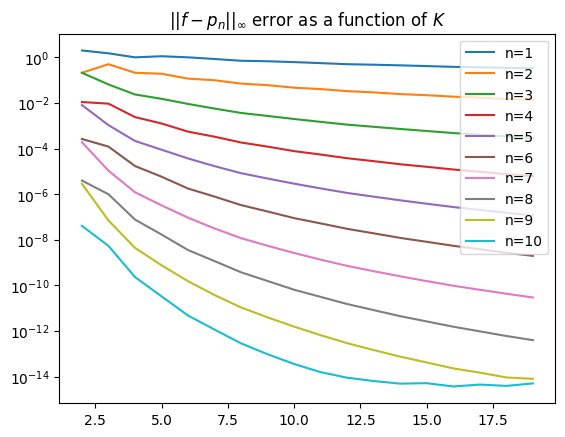

In [ ]:
def f(x):
    # return np.exp(3*x) * np.sin(2*x)
    return np.cos(2*np.pi*x)

a, b = 0, 1

def calc_error(K, n):
    intervals = np.arange(K + 1) * (b - a) / K + a
    v_k = np.array([np.linspace(intervals[i], intervals[i+1], n) for i in range(len(intervals)-1)])
    y_k = f(v_k)

    x_test   = np.array([np.linspace(intervals[i], intervals[i+1], 1000) for i in range(len(intervals)-1)])
    y_expect = f(x_test).flatten()
    y_interp = np.array([lagrange(x_k, v_k[k], y_k[k]) for k, x_k in enumerate(x_test)]).flatten()

    max_err  = np.max(np.abs(y_interp - y_expect))
    # print(f"Max error: {max_err}")
    return max_err

n_a = np.arange(1, 10+1, 1)
for n in n_a: 
    K   = np.arange(2, 20)
    err = np.array([calc_error(k, n) for k in K])
    plt.plot(K, err, label=f"n={n}")
plt.title(r"$||f - p_n||_\infty \text{ error as a function of } K$")
plt.yscale('log')
plt.legend(loc="upper right")
# plt.show()
plt.savefig("images/1c.png", dpi=300)

##### \# TODO: Discuss advantages and disadvantages of piecewise vs. simple lagrange and which I would recommend, and any additional cost for the various methods

#### d)

In [ ]:
# Helper function for the basis function phi(r)
def phi_func(r, eps=1.0):
    return np.exp(-(eps * r)**2)

def RBF(x, x_i, y_i, eps=1.0):
    assert(len(x_i) == len(y_i))
    if not (isinstance(x, list) or isinstance(x, np.ndarray)):
        x = np.array([x])

    M = np.array([[phi_func( np.abs(x_i[i] - x_i[j]), eps) for j in range(len(x_i))] for i in range(len(x_i))])
    M_inv = np.linalg.inv(M) # TODO: Figure out if I need to create my own matrix inverse function here
    w = np.dot(M_inv, y_i)

    out = np.zeros(x.shape)
    for i in range(len(x_i)):
        out += w[i] * phi_func(np.abs(x - x_i[i]), eps)

    return out

Max-norm error: 0.0015832993587315963


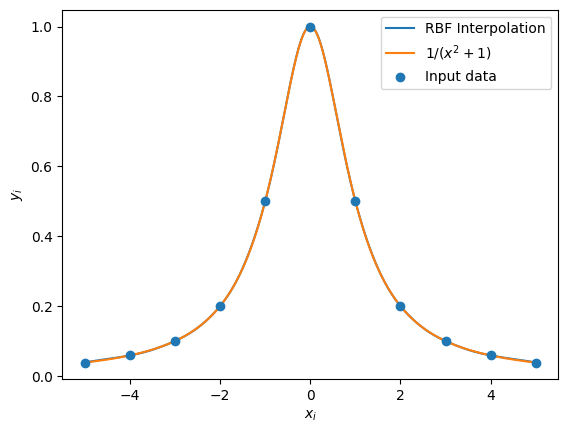

In [144]:
n = 10

def f(x):
    return 1/(x**2 + 1)

a, b   = -5, 5
x_i = np.linspace(a, b, n+1)
y_i = f(x_i) 

x_test   = np.linspace(a, b, 1000)
y_interp = RBF(x_test, x_i, y_i, 1.262)
y_expect = f(x_test)

max_err  = np.max(np.abs(y_interp - y_expect))
print(f"Max-norm error: {max_err}")

plt.plot(x_test, y_interp, label="RBF Interpolation")
plt.plot(x_test, y_expect, label=r"$1/(x^2 + 1)$")
plt.scatter(x_i, y_i, label="Input data", zorder=3)
# plt.show()
plt.xlabel(r"$x_i$")
plt.ylabel(r"$y_i$")
plt.legend(loc="upper right")
plt.show()

#### e)

In [ ]:
import autograd as ad
import autograd.numpy as anp

def f(x):
    return 1/(x**2 + 1)

N = 1000
a, b = -5, 5

x_eval  = anp.linspace(a, b, N+1)
y_eval  = f(x_eval)

# Calculate the gradient of C wrt. x and epsilon?
def C(z):
    x_nodes, eps = z[:-1], z[-1]
    y_nodes  = f(x_nodes)

    diff = x_nodes[:, None] - x_nodes[None, :]
    M = anp.exp(- (diff**2) * (eps**2))
    w = anp.linalg.solve(M, y_nodes)

    x_diff = (x_eval[:, None] - x_nodes[None, :])**2
    phi    = anp.exp(-x_diff * eps**2)
    
    y_interp = phi @ w

    return (b - a)/N * anp.sum( (y_eval - y_interp)**2 )

# Gradient descent
n = 20
epsilon = 1.0
x_nodes = anp.linspace(a, b, n+1)
x       = anp.array([*x_nodes, epsilon])

rho_up, rho_down = 15, 0.8
delta_C = ad.grad(C)

L_values = [0.001, 0.1, 1.0, 10, 100]
phi_history = []

for i, L in enumerate(L_values):
    phi_history.append([])
    x = anp.array([*x_nodes, epsilon])
    phi = C(x)

    num_iterations = 100
    for k in trange(num_iterations, desc="Optimizing"):
        g = delta_C(x)
        if anp.linalg.norm(g) < 1e-8:
            break

        Lk = L
        while True:
            x_tilde   = x - (1.0 / Lk) * g
            phi_tilde = C(x_tilde)
            if phi_tilde <= phi + anp.dot(g, x_tilde - x) + (Lk/2.0)*anp.sum((x_tilde - x)**2):
                # accept step
                x, phi = x_tilde, phi_tilde
                L = max(1e-12, rho_down * Lk)
                break
            else:
                Lk *= rho_up

        phi_history[i].append(phi)

Optimizing: 100%|██████████| 100/100 [00:00<00:00, 428.26it/s]


Minimum achieved 2-norm: 3.293212042111303e-07
Minimum achieved 2-norm: 3.5598038574251645e-07
Minimum achieved 2-norm: 3.73810816214678e-07
Minimum achieved 2-norm: 3.617426537672302e-07
Minimum achieved 2-norm: 4.158942746511105e-07


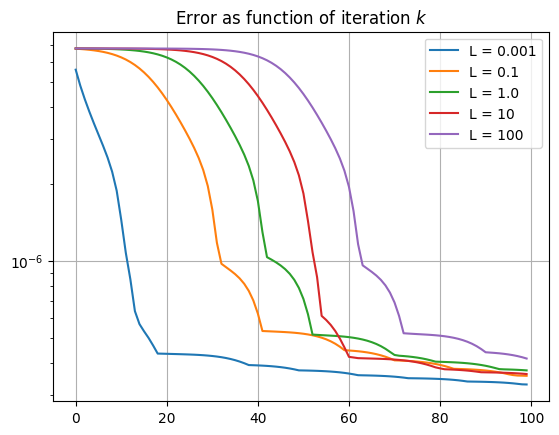

In [ ]:
for i, hist in enumerate(phi_history):
    print(f"Minimum achieved 2-norm: {np.min(hist)}")
    plt.plot(np.arange(k+1), np.array(hist), label=f"L = {L_values[i]}")
plt.title(r"Error as function of iteration $k$")
plt.yscale('log')
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [147]:
import pandas as pd

def error_2norm(a, b, N, f_exp, f_interp):
    return (b - a)/N * np.sum( (f_exp - f_interp)**2 )
    
# Error array for the table
error_data = []

# Compare gradient descent RBF against lagrange on equedistant and chebishev
n_values = np.arange(4, 20, 1)
for n in n_values:
    def f(x):
        return 1/(x**2 + 1)

    a, b   = -5, 5

    # Equedistant
    x_eq = np.linspace(a, b, n+1)
    y_eq = f(x_eq)

    # Chebychev
    k        = np.arange(0, n+1)
    x_cheb   = np.cos((k + 0.5)*np.pi / (n+1))
    x_cheb = (b - a)/2 * x_cheb + (b+a)/2  # Convert chebychev nodes from [-1, 1] -> [a, b] and evaluate
    y_cheb = f(x_cheb) 

    # Evaluate against higher resolution
    N        = 1000
    x_test   = np.linspace(a, b, N+1)
    y_expect = f(x_test)

    # Lagrangian Interpolation
    y_interp_cheb = lagrange(x_test, x_cheb, y_cheb)
    y_interp_eq   = lagrange(x_test, x_eq, y_eq)

    # Gradient descent
    epsilon = 1.0
    x_nodes = anp.linspace(a, b, n+1)
    x       = anp.array([*x_nodes, epsilon])

    L = 1
    rho_up, rho_down = 15, 0.8
    delta_C = ad.grad(C)

    x = anp.array([*x_nodes, epsilon])
    phi = C(x)

    num_iterations = 100
    for k in trange(num_iterations, desc="Optimizing"):
        g = delta_C(x)
        if anp.linalg.norm(g) < 1e-8:
            break

        Lk = L
        while True:
            x_tilde   = x - (1.0 / Lk) * g
            phi_tilde = C(x_tilde)
            if phi_tilde <= phi + anp.dot(g, x_tilde - x) + (Lk/2.0)*anp.sum((x_tilde - x)**2):
                # accept step
                x, phi = x_tilde, phi_tilde
                L = max(1e-12, rho_down * Lk)
                break
            else:
                Lk *= rho_up

    x_nodes_gradient, epsilon_gradient = x[:-1], x[-1]
    y_interp_gradient = RBF(x_test, x_nodes_gradient, f(x_nodes_gradient), epsilon_gradient)

    # Calculate error
    error_eq_lag = error_2norm(a, b, N+1, y_expect, y_interp_eq)
    error_ch_lag = error_2norm(a, b, N+1, y_expect, y_interp_cheb)
    error_gd_rbf = error_2norm(a, b, N+1, y_expect, y_interp_gradient)
    error_data.append([error_eq_lag, error_ch_lag, error_gd_rbf])

error_data = np.array(error_data)
table_data = np.column_stack((n_values, error_data))

print("\n\n")
print("2-norm error data for increasing valus of n:\n")

df = pd.DataFrame(error_data, columns=["Equidistant Lagrange", "Chebyshev Lagrange", "RBF (GD)"])
df.insert(0, "n", n_values)
print(df.to_string(index=False, float_format="{:.3e}".format))

Optimizing: 100%|██████████| 100/100 [00:00<00:00, 419.72it/s]




2-norm error data for increasing valus of n:

 n  Equidistant Lagrange  Chebyshev Lagrange  RBF (GD)
 4             7.787e-01           5.097e-01 3.929e-03
 5             2.132e-01           3.166e-01 3.902e-03
 6             7.497e-01           1.898e-01 3.541e-04
 7             1.059e-01           1.408e-01 5.600e-04
 8             1.356e+00           7.643e-02 2.944e-05
 9             1.200e-01           6.193e-02 8.790e-05
10             3.365e+00           3.229e-02 3.921e-06
11             2.694e-01           2.739e-02 1.475e-05
12             9.795e+00           1.405e-02 4.834e-06
13             7.846e-01           1.221e-02 5.252e-06
14             3.135e+01           6.220e-03 3.711e-06
15             2.540e+00           5.470e-03 1.677e-06
16             1.070e+02           2.780e-03 1.886e-06
17             8.758e+00           2.460e-03 1.358e-06
18             3.829e+02           1.249e-03 1.157e-06
19             3.160e+01           1.109e-03 3.930e-07


We see clearly that the equedistant lagrange performs the worst among the interpolation methods, increasing in error as $n$ increases. As for the Chebyshev nodes method, we do see an improvement as $n$ increases, though is unmatched by the RBF gradient descent implementation which achieves orders of magnitude lower 2-norm error as compared with the other methods. It is also possible to increase the number of iterations in the gradient ascent to futher improve this, though it seems that this method still outperforms the others.

#### f)
